In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
df=pd.read_csv('dataset_guardado.csv')

In [3]:
df

,Time segment,Holiday,Weekend Exit,Season,Weekend Return,Number,Exceeds Threshold
0,10-14,No,No,Fall,No,636,Yes
1,10-14,No,No,Fall,Yes,0,No
2,10-14,No,No,Spring,No,642,Yes
3,10-14,No,No,Spring,Yes,0,No
4,10-14,No,No,Summer,No,589,Yes
...,...,...,...,...,...,...,...
187,6-10,Yes,Yes,Spring,Yes,0,No
188,6-10,Yes,Yes,Summer,No,2,No
189,6-10,Yes,Yes,Summer,Yes,0,No
190,6-10,Yes,Yes,Winter,No,0,No


In [4]:

df = df.drop('Number', axis=1)




In [5]:
df

,Time segment,Holiday,Weekend Exit,Season,Weekend Return,Exceeds Threshold
0,10-14,No,No,Fall,No,Yes
1,10-14,No,No,Fall,Yes,No
2,10-14,No,No,Spring,No,Yes
3,10-14,No,No,Spring,Yes,No
4,10-14,No,No,Summer,No,Yes
...,...,...,...,...,...,...
187,6-10,Yes,Yes,Spring,Yes,No
188,6-10,Yes,Yes,Summer,No,No
189,6-10,Yes,Yes,Summer,Yes,No
190,6-10,Yes,Yes,Winter,No,No


In [6]:
X = df[['Time segment', 'Holiday', 'Weekend Exit', 'Season', 'Weekend Return']]
y=df['Exceeds Threshold']

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [8]:
# Suponiendo que deseas mapear 'Yes' a 1 y 'No' a 0 en la columna 'Exceeds Threshold'
mapeo = {'Yes': 1, 'No': 0}
df['Exceeds Threshold'] = df['Exceeds Threshold'].map(mapeo)
df['Weekend Exit'] = df['Weekend Exit'].map(mapeo)
df['Holiday'] = df['Holiday'].map(mapeo)
df['Weekend Return'] = df['Weekend Return'].map(mapeo)
mapi= {'6-10': 0, '10-14': 1, '14-18': 2, '18-22': 3, '22-2': 4, '2-6': 5}
df['Time segment'] = df['Time segment'].map(mapi)
mapis= {'Winter': 0, 'Spring': 1, 'Summer': 2, 'Fall': 3}
df['Season'] = df['Season'].map(mapis)

In [9]:
X = df[['Time segment', 'Holiday', 'Weekend Exit', 'Season', 'Weekend Return']]
y=df['Exceeds Threshold']

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [11]:
from sklearn.tree import DecisionTreeClassifier
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(X_train, y_train)
y_pred_en = clf_en.predict(X_test)

Model accuracy score with criterion entropy: 0.9375


[Text(0.625, 0.875, 'x[4] <= 0.5\nentropy = 0.625\nsamples = 128\nvalue = [108, 20]'),
 Text(0.5, 0.625, 'x[1] <= 0.5\nentropy = 0.885\nsamples = 66\nvalue = [46, 20]'),
 Text(0.25, 0.375, 'x[0] <= 4.5\nentropy = 0.999\nsamples = 35\nvalue = [17, 18]'),
 Text(0.125, 0.125, 'entropy = 0.94\nsamples = 28\nvalue = [10, 18]'),
 Text(0.375, 0.125, 'entropy = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.75, 0.375, 'x[2] <= 0.5\nentropy = 0.345\nsamples = 31\nvalue = [29, 2]'),
 Text(0.625, 0.125, 'entropy = 0.523\nsamples = 17\nvalue = [15, 2]'),
 Text(0.875, 0.125, 'entropy = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(0.75, 0.625, 'entropy = 0.0\nsamples = 62\nvalue = [62, 0]')]

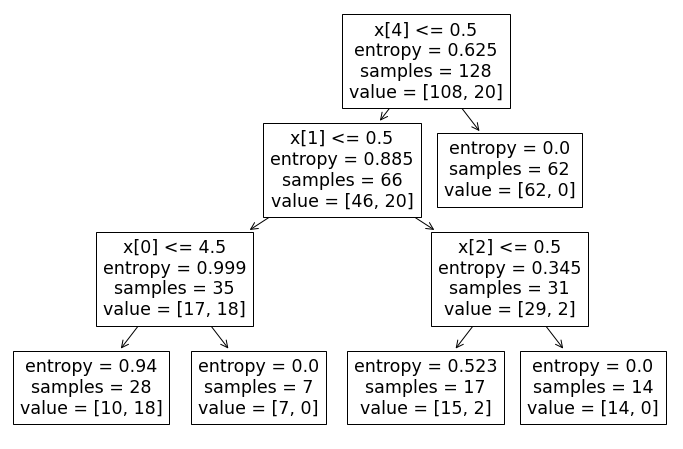

In [12]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))
y_pred_train_en = clf_en.predict(X_train)
y_pred_train_en
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_en.fit(X_train, y_train))

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_en)


In [14]:
cm

array([[51,  3],
       [ 1,  9]], dtype=int64)

In [15]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred_en)
print(conf_matrix)


[[51  3]
 [ 1  9]]


In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_en))


              precision    recall  f1-score   support

           0       0.98      0.94      0.96        54
           1       0.75      0.90      0.82        10

    accuracy                           0.94        64
   macro avg       0.87      0.92      0.89        64
weighted avg       0.94      0.94      0.94        64



In [17]:
feature_importance = clf_en.feature_importances_
print("Feature Importance:", feature_importance)


Feature Importance: [0.19301608 0.2840024  0.04049629 0.         0.48248524]


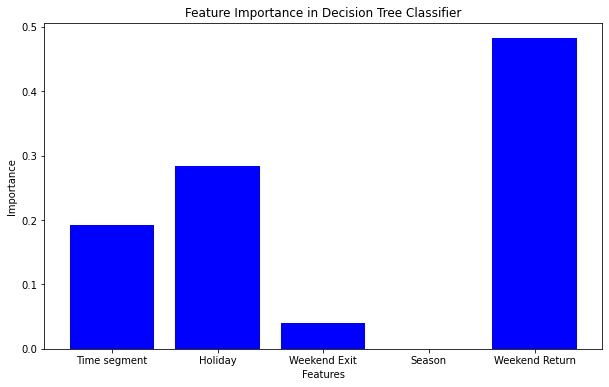

In [18]:
import matplotlib.pyplot as plt

feature_names = X.columns  # Obtén los nombres de las características desde tus datos

# Crea un gráfico de barras para visualizar la importancia de las características
plt.figure(figsize=(10, 6))
plt.bar(feature_names, feature_importance, color='blue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Decision Tree Classifier')
plt.show()
